<a href="https://colab.research.google.com/github/anaguilarar/Crop_DL/blob/main/Rice_seeds_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To boost the process, please use gpu, habilitate the option in:
 runtime -> change runtime type -> hardware accelerator -> gpu . 

In [2]:
import os
if not os.path.exists("Crop_DL"):
    !git clone https://github.com/anaguilarar/Crop_DL.git
    print("Cloned")
    
else:
    print("crop_dl directory already exists")
if not os.getcwd().endswith("Crop_DL"):
  os.chdir("Crop_DL")

Cloning into 'Crop_DL'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 103 (delta 23), reused 96 (delta 17), pack-reused 0
Receiving objects: 100% (103/103), 958.77 KiB | 9.88 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Cloned


In [5]:
from crop_dl.seeds.rice_counting import RiceSeedsCounting
from crop_dl.models.dl_initilizer import DLInstanceModel
from crop_dl.models.utils import check_weigth_path, downloadzip

import matplotlib.pyplot as plt
import torch
import os

### Configuration

Here the user defines the folder's name that contains the images that will be analyzed.
Likewise, the model will be updated with a pre-trained version. this version is stored in an amazon bucket


In [6]:
IMAGESPATH = "example_imagery/seeds"
WEIGHTSURL= "https://dlmodels-bucket.s3.ap-northeast-1.amazonaws.com/maskrcnn_rice_seeds.zip"

WEIGHTSPATH = check_weigth_path(WEIGHTSURL, suffix="checkpoint", weights_path="model_weights")


['maskrcnn_rice_seeds_20230308-000041/checkpoint']


### Setting the model and datasets


In [7]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

seed_model = DLInstanceModel(WEIGHTSPATH,
                 device = device)

ricecounts = RiceSeedsCounting(
                 IMAGESPATH,
                 seed_model.model, 
                 imagessuffix = ".jpg",
                 device = device)

print("files available in folder: ",ricecounts.listfiles)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

weights loaded
files available in folder:  ['test4.jpg', 'test10.jpg', 'test3.jpg', 'test5.jpg', 'test9.jpg', 'test.jpg', 'test8.jpg', 'test6.jpg', 'test2.jpg', 'test7.jpg']


### Detecting the rice seeds for an specific image

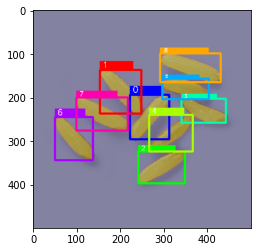

In [8]:
img_number = 3
ricecounts.detect_rice(img_number, keepsize=True, segment_threshold = 170)
m = ricecounts.plot_prediction(only_image=True)
plt.imshow(m[:,:,[2,1,0]])

#### Extracting information for a single seed

{'fn': ['test5.jpg'], 'seed_id': [6], 'height': [35.38361202590826], 'width': [34.655446902326915], 'area': [3869.0]}


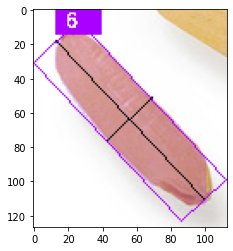

In [9]:
seed_number = 6
m = ricecounts.plot_individual_seed(seed_number)
print(ricecounts.calculate_oneseed_metrics(seed_number))
plt.imshow(m[:,:,[2,1,0]])

#### Extracting information for all seeds

In [10]:
ricecounts.one_image_seeds_summary()

,fn,seed_id,height,width,area
0,test5.jpg,0,123.987903,35.468296,3969.0
0,test5.jpg,1,37.483330,36.769553,4194.0
0,test5.jpg,2,123.308556,34.132096,3761.0
0,test5.jpg,3,36.249138,33.615473,3137.0
0,test5.jpg,4,122.886126,32.202484,3468.0
0,test5.jpg,5,37.000000,36.687873,3375.0
0,test5.jpg,6,35.383612,34.655447,3869.0
0,test5.jpg,7,39.357337,38.910153,4514.0
0,test5.jpg,8,38.275318,37.000000,4887.0


#### Extracting the data for all the files that are inside the folder

In [11]:
ricecounts.all_image_seeds_summary()

,fn,seed_id,height,width,area
0,test4.jpg,0,87.235314,26.000000,2168.0
0,test4.jpg,1,82.225300,46.324939,2716.0
0,test4.jpg,2,103.174609,29.154759,2608.0
0,test4.jpg,3,27.313001,26.000000,2079.0
0,test4.jpg,4,29.068884,27.658633,2608.0
...,...,...,...,...,...
0,test2.jpg,11,70.000000,30.000000,1802.0
0,test7.jpg,0,148.000000,67.000000,8892.0
0,test7.jpg,1,144.000000,122.000000,15605.0
0,test7.jpg,2,151.000000,66.000000,8724.0


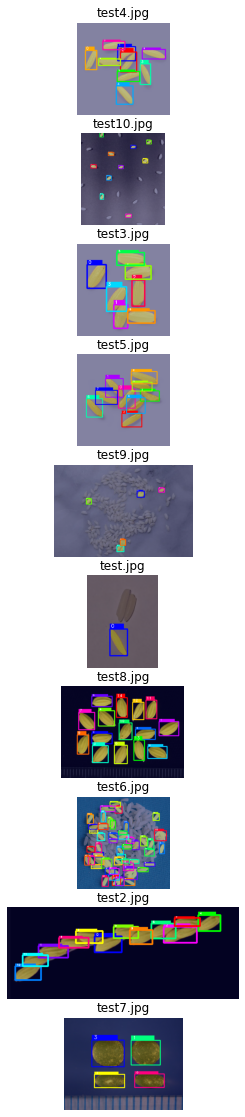

In [12]:
images = ricecounts.all_image_predictions()

f, ax = plt.subplots(nrows=len(images), ncols=1, figsize = (10,20))

for i in range(len(images)):
    ax[i].imshow(images[i])
    ax[i].set_axis_off()
    ax[i].set_title(ricecounts.listfiles[i])